In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
originX = np.array([[62.47, 2.0], [65.78, 3.0], [58.05, 2.0], [52.09, 2.0], [74.98, 3.0], [55.87, 2.0], [90.66, 3.0], [113.68, 3.0], [97.92, 2.0], [46.33, 2.0], [134.55, 3.0], [151.15, 3.0], [63.01, 2.0], [65.66, 2.0], [108.81, 3.0], [66.19, 3.0], [54.1, 2.0], [73.44, 2.0], [51.78, 2.0], [92.42, 3.0], [59.13, 2.0], [49.49, 1.0], [51.68, 2.0], [52.87, 2.0], [69.46, 2.0], [76.41, 2.0], [63.1, 2.0], [197.37, 5.0], [93.53, 3.0], [91.35, 3.0], [103.49, 3.0], [45.12, 2.0], [59.59, 2.0], [174.66, 4.0], [35.8, 1.0], [91.35, 3.0], [55.07, 2.0], [119.44, 3.0], [65.85, 2.0], [72.05, 3.0], [85.98, 3.0], [103.29, 4.0], [184.05, 5.0], [90.87, 3.0], [38.83, 1.0], [51.65, 1.0], [50.14, 1.0]])
Y = np.array([[213.0], [226.0], [179.0], [188.0], [215.0], [152.0], [290.0], [375.0], [305.0], [166.0], [385.0], [500.0], [195.0], [200.0], [310.0], [205.0], [158.0], [270.0], [150.0], [310.0], [180.0], [200.0], [155.0], [178.0], [303.0], [250.0], [218.0], [630.0], [326.0], [310.0], [530.0], [138.0], [230.0], [560.0], [115.0], [400.0], [140.0], [547.0], [240.0], [250.0], [315.0], [330.0], [680.0], [302.0], [130.0], [162.0], [140.0]]) 
originX.shape, Y.shape

((47, 2), (47, 1))

## 假设函数：
$$ h_\theta (X) = X \theta $$
$ X : m*n $ <br/>
$ \theta : n*1 $ <br/>
$ h_\theta(X)=Y : m * 1 $

## 这个过程其实就是在尝试求 $ h_\theta(X) = X_0 * \theta_0 + X_1 * \theta_1 ...... X_n * \theta_n = Y $ 这个式子的解

In [3]:
def h(theta, X):
    '''定义函数模型'''
    
    return np.dot(X, theta)

## 损失函数： $$ J(\theta_0,\theta_1,\theta_2,...,\theta_n) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2 $$

## 损失函数的原理是利用平方误差和的值的变化来求出每一次下降的时候得到的值不断缩小这个值，理论上，当 平方误差和的值 = 0 的时候，这一点的导数也等于0，这时候得到的就是误差最小的值，所以在下降的过程中，我们用学习率来控制下降的步长，最终无限逼近误差为0

## 这里的分母的 1/2m 中的 2 其实可以改一改，2的位置值越大，迭代次数越少，收敛越快，原因是，当分母的m倍数扩大越快的时候,损失函数J被缩小的比例就越小，最终迭代判断是否拟合的时候 abs(J^(n-1) - J^(n))的值之间的距离就越近
## (上面这种优化其实是负优化，因为1/2m的位置是最小二乘法的位置，为了保持在求导过程中的同等约束所以改了2后还是要在下降的损失函数里除以相等的数 ，而如果不除以相等数，也不过是加大的学习率而已，没有起到优化收敛最小值的意义）

# L1，L2正则化

## 一般回归分析中回归ww表示特征的系数，从上式可以看到正则化项是对系数做了处理（限制）。L1正则化和L2正则化的说明如下：

## L1正则化是指权值向量ww中各个元素的绝对值之和，通常表示为||w||1||w||1
## L2正则化是指权值向量ww中各个元素的平方和然后再求平方根（可以看到Ridge回归的L2正则化项有平方符号），通常表示为||w||2||w||2
## 一般都会在正则化项之前添加一个系数，Python中用αα表示，一些文章也用λλ表示。这个系数需要用户指定。

## 那添加L1和L2正则化有什么用？下面是L1正则化和L2正则化的作用，这些表述可以在很多文章中找到。

## L1正则化可以产生稀疏权值矩阵，即产生一个稀疏模型，可以用于特征选择
## L2正则化可以防止模型过拟合（overfitting）；一定程度上，L1也可以防止过拟合

In [4]:
def J(theta, X, Y):
    '''定义损失函数'''
    m = len(X)
    return ((h(theta,X)-Y)**2).sum()/(2*m)
    #return np.sum(np.dot((h(theta, X) - Y).T, (h(theta, X) - Y)) / (2 * m))

## 梯度函数
梯度下降公式： $$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)} $$
$ x_j^{(i)} : m*1 $ 即所有样本的第j列<br/>
$ h_\theta(x^{(i)}) - y^{(i)} : m * 1 $


## 偏导数是函数某一点沿着任意方向上因变量与自变量的变化率的比值，是一个向量，有大小也有方向，那么既然偏导数既有大小也有方向，则肯定存在一个偏导数，其模值（即大小）最大。这个最大的模值就是梯度的模值，模值最大的偏导数的方向就是梯度的方向。梯度的定义如下：
## 学习率是实际步长与梯度模的比值，偏导与梯度模的比值就是梯度在参数方面的余弦值，这么一来，在参数只有一个的情况下，梯度下降法可以用几何的方式很好地解释了。

# 下面是一个基本的BGD类型的梯度下降算法，
# 其实也可以在cost损失函数后面加一个分母，然后加大学习率来提高收敛速度（因为分母减小了损失函数的结果,这就减少了函数在的摆动范围，而学习率加大了近似极限的实数域，从而加大了训练速度）这种算法也叫 --- RMSprop

In [5]:

def bgd(alpha, X, Y, maxloop, epsilon):
    '''定义梯度下降函数'''
    m, n = X.shape # m 是数据矩阵的高，n是数据矩阵的宽

    theta = np.zeros((n,1))  #初始化参数为定义为0
    
    count = 0 # 记录迭代次数
    converged = False # 是否已收敛的标志，如果收敛则最后两次的迭代的损失函数之间的差值会小于学习率
    cost = np.inf # 初始化代价值为无穷大
    
    costs = [J(theta, X, Y),]#[cost,] # 记录每一次的代价值，里面放一个初始的损失函数，保证下降最后两次相互减少不会报错，其实放无穷大也是一样的
    
    thetas = {}  # 记录每一次参数的更新
    for i in range(n):
        thetas[i] = [theta[i,0],]

    
    #开始梯度下降，满足以下条件则停止 1.达到最大次数 count <= maxloop 2. 两个梯度的损失函数差值小于学习率的值 abs(cost[-1]-cost[-2]) < epsilon
    while count <= maxloop:
        if converged: #假如直接满足收敛值，就终止迭代，指出现极端情况第一次预期函数就直接满足了，可以得到方程解或者足够精度的解
            break
        count += 1

        '''用 alpha * （1.0 / m） 来控制 alpha 和（1.0 / m） 的两个点 间的距离 ， 从而控制 损失函数斜率的变化逼近 斜率为 0 得到 近似解'''
        theta = theta - alpha * 1.0 / m * np.dot(X.T, (h(theta, X) - Y))#n个参数同时计算更新值
        
        for j in range(n): #添加到thetas中
            thetas[j].append(theta[j,0])
        #print('theta:',theta)
            
        
        cost = J(theta, X, Y) # 记录当前参数的函数代价，并存入costs
        
        costs.append(cost)
        print({'cost':[count,cost],"costs":abs(costs[-1] - costs[-2])<epsilon})
            
        if abs(costs[-1] - costs[-2]) <= epsilon : #当两次损失函数的值小于收敛的值时，则完成函数的收敛，得到近似的最小值，也就得到了行列式的近似解，拿到了每项的参数
            converged = True
    
    return theta, thetas, costs

## 标准化数据

In [6]:
def standarize(X):
    '''
    特征标准化处理：
    Args:
       X 样本集
    Returns:
      标准后的样本集
    '''
    m, n = X.shape #m是行，n是列
    values = {}  # 保存每一列的mean和std，便于对预测数据进行标准化
    for j in range(n):
        features = X[:,j] #分别拿出每一列的特征值
        meanVal = features.mean(axis=0) #特征值的均值
        stdVal = features.std(axis=0) #特征值的标准差
        print("特征值"+str(j),features,'特征值的均值',meanVal,'特征值的标准差',stdVal)
        values[j] = [meanVal, stdVal] 
        if stdVal != 0: #如果标准差不等于0就把数据归一化
            X[:,j] = (features - meanVal) / stdVal #数据归一化
        else: #要不就直接=0
            X[:,j] = 0
    return X, values
    

## 运行

In [7]:
# 对特征X增加x0列
m,n = originX.shape #m是数据的行 n是数据的列
X, values = standarize(originX.copy()) #标准化数据
X = np.concatenate((np.ones((m,1)), X), axis=1) #给 X 添加一列 1方便后面的函数中直接用J
print(X.shape, Y.shape)

特征值0 [ 62.47  65.78  58.05  52.09  74.98  55.87  90.66 113.68  97.92  46.33
 134.55 151.15  63.01  65.66 108.81  66.19  54.1   73.44  51.78  92.42
  59.13  49.49  51.68  52.87  69.46  76.41  63.1  197.37  93.53  91.35
 103.49  45.12  59.59 174.66  35.8   91.35  55.07 119.44  65.85  72.05
  85.98 103.29 184.05  90.87  38.83  51.65  50.14] 特征值的均值 81.07574468085106 特征值的标准差 36.96655980199384
特征值1 [2. 3. 2. 2. 3. 2. 3. 3. 2. 2. 3. 3. 2. 2. 3. 3. 2. 2. 2. 3. 2. 1. 2. 2.
 2. 2. 2. 5. 3. 3. 3. 2. 2. 4. 1. 3. 2. 3. 2. 3. 3. 4. 5. 3. 1. 1. 1.] 特征值的均值 2.4680851063829787 特征值的标准差 0.895641071482944
(47, 3) (47, 1)


## 模型训练
定义梯函数的 学习率 最大迭代次数 收敛精度

In [8]:
alpha = 1 # 学习率
maxloop = 5000 # 最大迭代次数
epsilon = 0.000001 # 收敛精度值
X.shape

(47, 3)

In [9]:
%time
resault = bgd(alpha, X, Y, maxloop, epsilon)
theta , thetas, costs = resault

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.34 µs
{'cost': [1, 7115.266326086189], 'costs': False}
{'cost': [2, 5513.134871859729], 'costs': False}
{'cost': [3, 4330.663689355221], 'costs': False}
{'cost': [4, 3457.9275017190353], 'costs': False}
{'cost': [5, 2813.794719052398], 'costs': False}
{'cost': [6, 2338.385256738651], 'costs': False}
{'cost': [7, 1987.503943227839], 'costs': False}
{'cost': [8, 1728.5320338933502], 'costs': False}
{'cost': [9, 1537.3948965140357], 'costs': False}
{'cost': [10, 1396.323977357424], 'costs': False}
{'cost': [11, 1292.204995015456], 'costs': False}
{'cost': [12, 1215.35880624219], 'costs': False}
{'cost': [13, 1158.6416102405913], 'costs': False}
{'cost': [14, 1116.7808442919372], 'costs': False}
{'cost': [15, 1085.8850340378726], 'costs': False}
{'cost': [16, 1063.082032955044], 'costs': False}
{'cost': [17, 1046.2520209208062], 'costs': False}
{'cost': [18, 1033.8304407944115], 'costs': False}
{'cost': [19, 1024.66255353904

In [10]:
theta

array([[275.55319149],
       [125.4886707 ],
       [  3.7666334 ]])

进行梯度下降

## 因为数据当中有三列数据，所有有三个参数去拟合我们的对应的Y向量的结果，所以参数当中有三个向量分别对应了这种情况

求出期望参数，也就是方程的近似解为

In [11]:
theta

array([[275.55319149],
       [125.4886707 ],
       [  3.7666334 ]])

In [12]:
costs[-10:]

[998.8303597673699,
 998.8303491399436,
 998.8303412962517,
 998.8303355071266,
 998.8303312343978,
 998.8303280808615,
 998.830325753359,
 998.8303240355193,
 998.8303227676487,
 998.8303218318822]

所有的下降过程得到的损失值

##  4.预测价格

In [13]:
normalizedSize = (70 -values[0][0] ) / values[0][1] 
normalizedBr = (2-values[1][0]) / values[1][1]
predicateX = np.matrix([[1, normalizedSize, normalizedBr]])
predicateX,normalizedBr

(matrix([[ 1.        , -0.29961524, -0.52262577]]), -0.5226257719601379)

In [14]:
price = h(theta, predicateX)
print('70㎡两居估价: ￥%.4f万元'%price)

70㎡两居估价: ￥235.9863万元


In [15]:
print(values)

{0: [81.07574468085106, 36.96655980199384], 1: [2.4680851063829787, 0.895641071482944]}


In [16]:
reduction_standardization = np.array([values[i] for i in values])
h(theta,np.r_[np.ones(1),(np.array([70,2])-reduction_standardization[:,0])/reduction_standardization[:,-1]])

array([235.98633364])

In [17]:
theta,np.r_[np.ones(1),(np.array([70,2])-reduction_standardization[:,0])/reduction_standardization[:,-1]]

(array([[275.55319149],
        [125.4886707 ],
        [  3.7666334 ]]),
 array([ 1.        , -0.29961524, -0.52262577]))

### values 里的分别是 mean , std 下面要将需要预测的数据也标准化

5.绘制拟合平面

### 整理出标准化的后的新X向量，在用求出来的行列式近似解通过期望函数的计算拿到预测的价格

In [18]:
predicateX = np.matrix([[1, normalizedSize, normalizedBr]])
price = h(theta, predicateX)

In [19]:
print('70㎡两居估价: ￥%.4f万元'%price)

70㎡两居估价: ￥235.9863万元


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


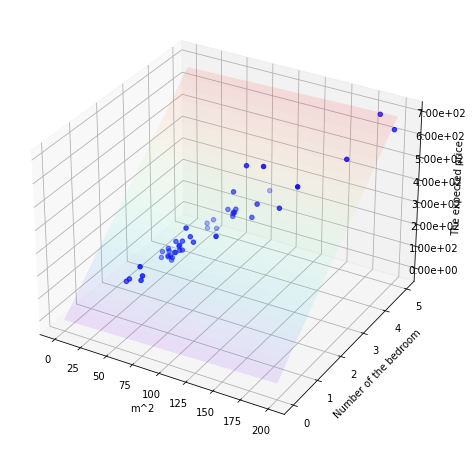

In [20]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib.ticker as mtick

# 打印拟合平面
fittingFig = plt.figure(figsize=(10, 8))
title = 'bgd: rate=%.3f, maxloop=%d, epsilon=%.3f \n'%(alpha,maxloop,epsilon)
ax=fittingFig.gca(projection='3d')

xx = np.linspace(0,200,25)
yy = np.linspace(0,5,25)
zz = np.zeros((25,25))
for i in range(25):
    for j in range(25):
        normalizedSize = (xx[i]-values[0][0])/values[0][1]
        normalizedBr = (yy[j]-values[1][0])/values[1][1]
        x = np.matrix([[1,normalizedSize, normalizedBr]])
        zz[i,j] = h(theta, x)
xx, yy = np.meshgrid(xx,yy)
ax.zaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, cmap=cm.rainbow, alpha=0.1, antialiased=True)

xs = originX[:, 0].flatten()
ys = originX[:, 1].flatten()
zs = Y[:, 0].flatten()
ax.scatter(xs, ys, zs, c='b', marker='o')

ax.set_xlabel(u'm^2')
ax.set_ylabel(u'Number of the bedroom ')
ax.set_zlabel(u'The expected price')

plt.show()

Text(0, 0.5, 'cost')

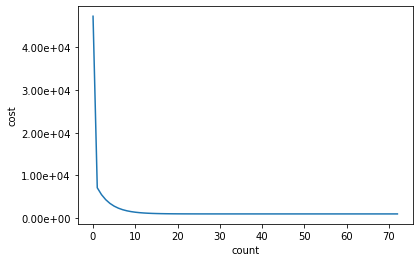

In [21]:
%matplotlib inline
errorsFig = plt.figure()
ax = errorsFig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))

ax.plot(range(len(costs)), costs)
ax.set_xlabel(u'count')
ax.set_ylabel(u'cost')

在图中查看函数收敛的速率

## 更多优化方法:
1. https://www.jianshu.com/p/548049548fb9
2. https://www.cnblogs.com/maybe2030/p/5089753.html